In [13]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [14]:
# load yolo
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [15]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [68]:
# layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes),3))

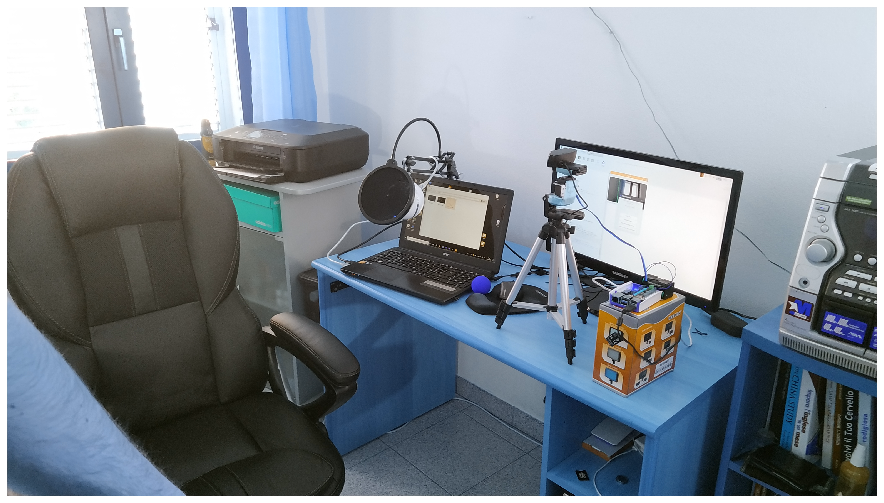

In [42]:
# image
img = cv2.imread('room_ser.jpg')
height, width, channels = img.shape
plt.figure(figsize=(16,9)); plt.axis('off'); plt.imshow(img)


In [45]:
# detect object
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

In [31]:
net.setInput(blob)
outs = net.forward(output_layers)

In [49]:
# show info
conf_value = 0.5 # how sure is the alg of detect an object
boxes, confidences, class_ids = [],[],[]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_value:
            # object detected
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            # rectangle coord
            x = int(center_x - w/2) # top left
            y = int(center_y - h/2) # top right
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
            #cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

In [62]:
# handle noise, duplicated objects
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
indexes

array([[1],
       [2],
       [3],
       [5],
       [6]], dtype=int32)

In [78]:
img = cv2.imread('room_ser.jpg')
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img, (x,y), (x+w,y+h), colors[i], 10)
        cv2.putText(img, label, (x, y+70), cv2.FONT_HERSHEY_PLAIN, 5, colors[i], 10)

img = cv2.resize(img,(1200,600))
cv2.imshow('result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

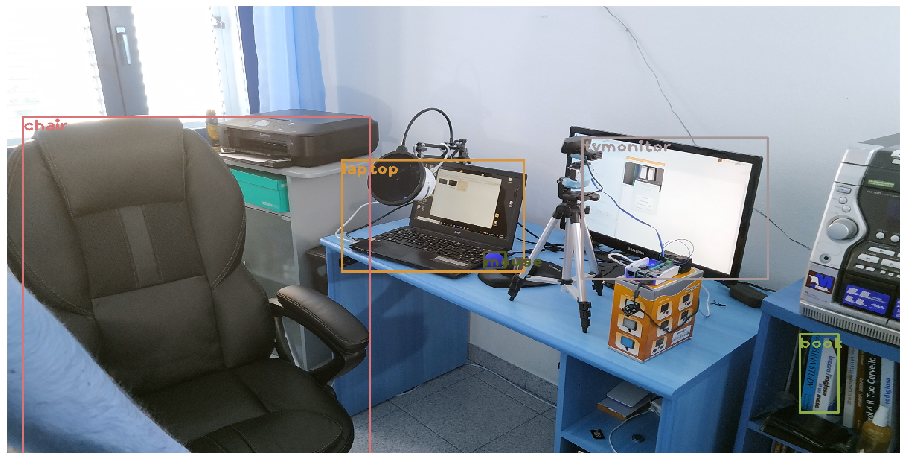

In [79]:
plt.figure(figsize=(16,9)); plt.axis('off'); plt.imshow(img)